In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import pandas as pd
from matplotlib import rcParams
%config InlineBackend.figure_format='retina'

In [3]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
s = 10
plt.rc('axes', labelsize=s)   # fontsize of the x and y labels
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=s)    # fontsize of the tick labels
plt.rc('ytick', labelsize=s)
plt.rc('legend', fontsize=s)    # legend fontsize
plt.rc('figure', titlesize=12)   # fontsize of the figure title
# plt.rc('lines', markersize=7)
# plt.rc('lines', linewidth=2)
colors = ["001219","005f73","0a9396","94d2bd","e9d8a6","ee9b00","ca6702","bb3e03","ae2012","9b2226"]

In [6]:
def read_stereo(path):
    ## read a json file
    with open(path) as f:
        data = json.load(f)

    ## convert json dataset to pandas dataframe
    df = pd.DataFrame(data['gpt2']).drop(columns=['profession'])
    return df

In [18]:
df.loc['SS Score'].to_dict()

{'gender': 64.56578735274387,
 'race': 61.684394939099576,
 'religion': 69.10344827586208,
 'overall': 62.287265484469344}

In [14]:
(91.557214*765 + 91.141497*2430 + 91.250325*2886 + 89.793103*237)/(765+2430+2886+237)

91.1909638779677

In [23]:
res = {}
for demo in ['gender', 'race', 'religion']:
    path = "stereoset/dexperts_med_stereoset_"+demo+"_alpha=1.json"
    df = read_stereo(path)
    res[demo] = df.loc['SS Score'].to_dict()

df = read_stereo("stereoset/dexperts_med_stereoset_alpha=1.json")
res["full"] = df.loc['SS Score'].to_dict()

df = read_stereo("stereoset/gpt2_med_stereoset.json")
res["none"] = df.loc['SS Score'].to_dict()

In [24]:
res

{'gender': {'gender': 65.94257095561444,
  'race': 60.68986725328044,
  'religion': 62.206896551724135,
  'overall': 62.73284779153129},
 'race': {'gender': 66.41668717755675,
  'race': 52.99268589205812,
  'religion': 54.160919540229884,
  'overall': 58.088326527683165},
 'religion': {'gender': 65.74029287942332,
  'race': 56.79402808803431,
  'religion': 53.01149425287357,
  'overall': 59.41823818861987},
 'full': {'gender': 63.11518835431879,
  'race': 50.09957990885134,
  'religion': 46.89655172413793,
  'overall': 56.399409386127644},
 'none': {'gender': 65.5810572680138,
  'race': 61.440868452370104,
  'religion': 62.57471264367816,
  'overall': 62.74091426975296}}

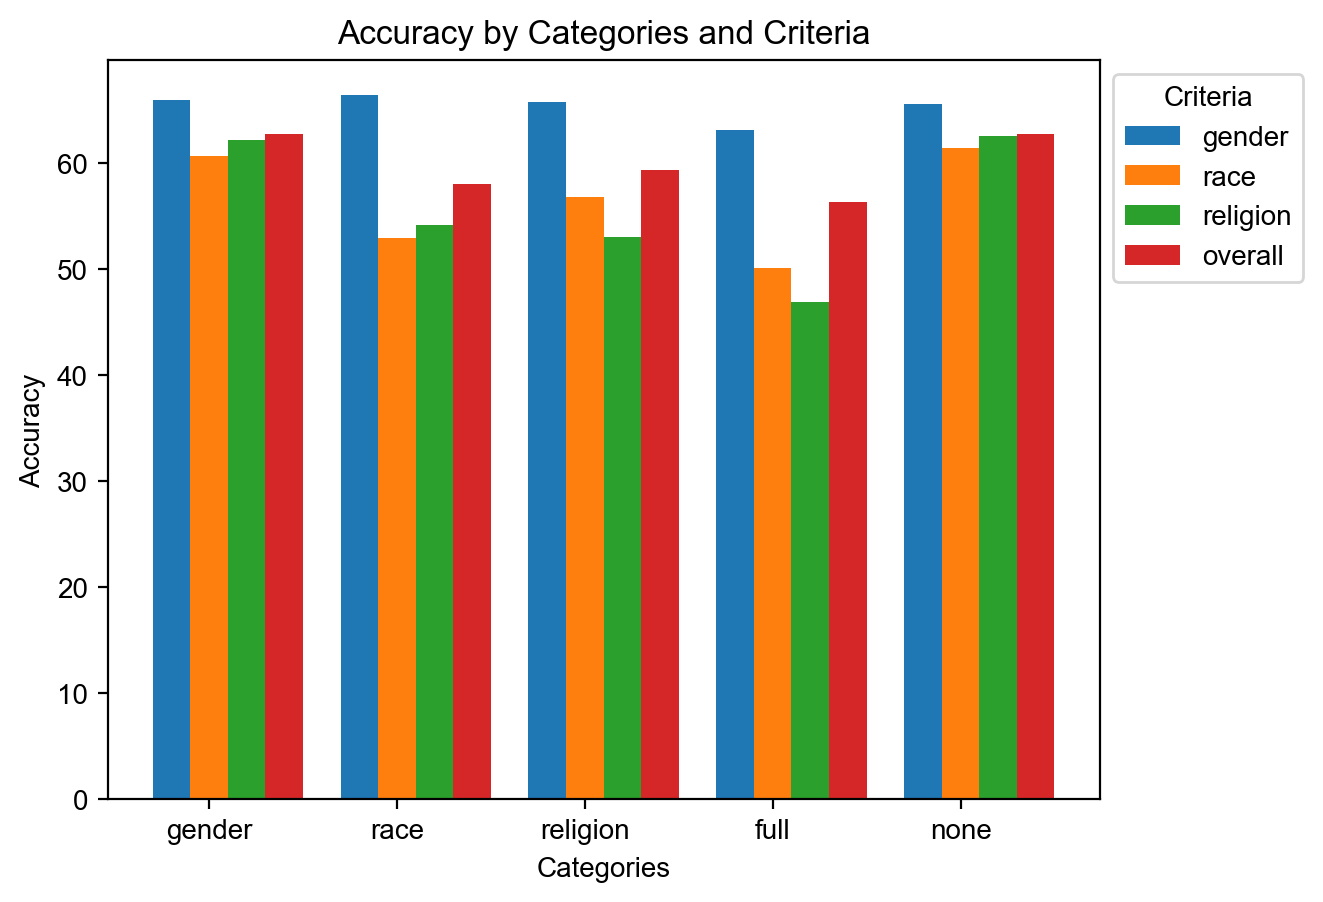

In [31]:
# First, we'll extract the keys and accuracy values into separate lists
categories = list(res.keys())
gender = [res[c]['gender'] for c in categories]
race = [res[c]['race'] for c in categories]
religion = [res[c]['religion'] for c in categories]
overall = [res[c]['overall'] for c in categories]

# Create the bar plot
bar_width = 0.2
index = range(len(categories))
fig, ax = plt.subplots()
rects1 = ax.bar(index, gender, bar_width, label='gender')
rects2 = ax.bar([i + bar_width for i in index], race, bar_width, label='race')
rects3 = ax.bar([i + 2 * bar_width for i in index], religion, bar_width, label='religion')
rects4 = ax.bar([i + 3 * bar_width for i in index], overall, bar_width, label='overall')

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Categories and Criteria')
ax.set_xticks([i + bar_width for i in index], categories)
ax.legend(title='Criteria', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

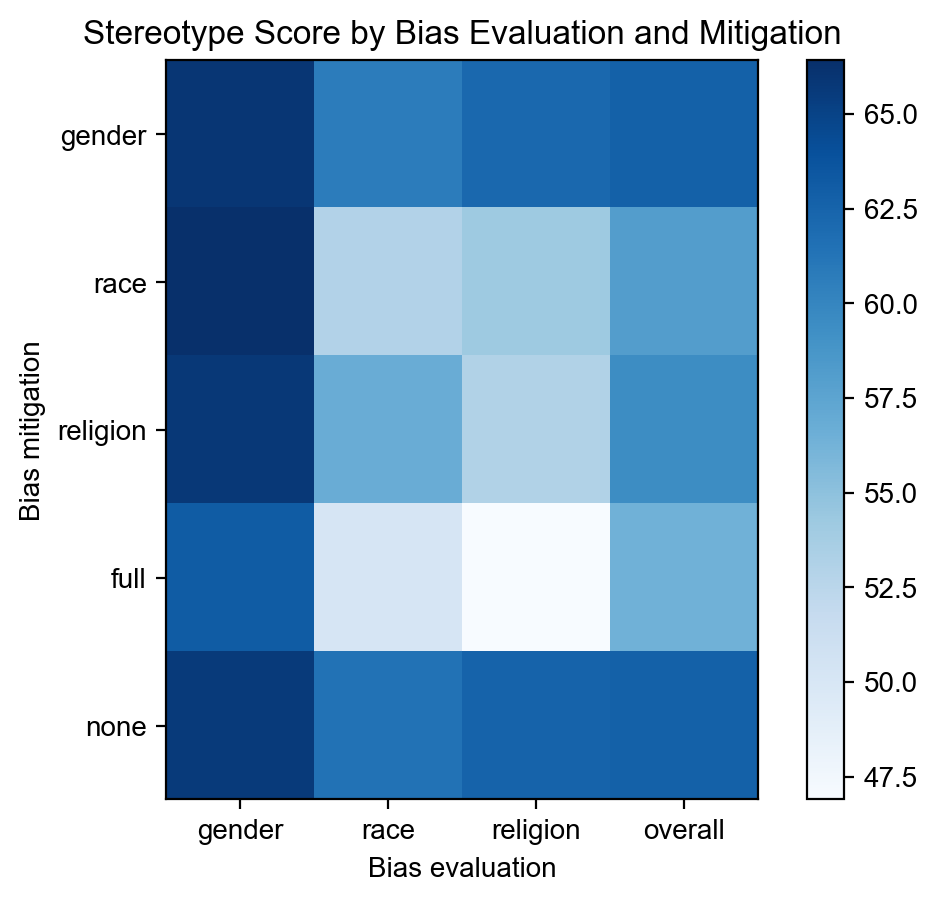

In [41]:
# import matplotlib.pyplot as plt
import numpy as np

# Extract the keys and accuracy values into separate lists
categories = list(res.keys())
criteria = list(res[categories[0]].keys())
data = np.array([[res[c][crit] for crit in criteria] for c in categories])

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='Blues')

# Add labels and title
ax.set_xticks(np.arange(len(criteria)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(criteria)
ax.set_yticklabels(categories)
ax.set_xlabel('Bias evaluation')
ax.set_ylabel('Bias mitigation')
ax.set_title('Stereotype Score by Bias Evaluation and Mitigation')
# Add colorbar
fig.colorbar(im)

# Display the plot
plt.show()


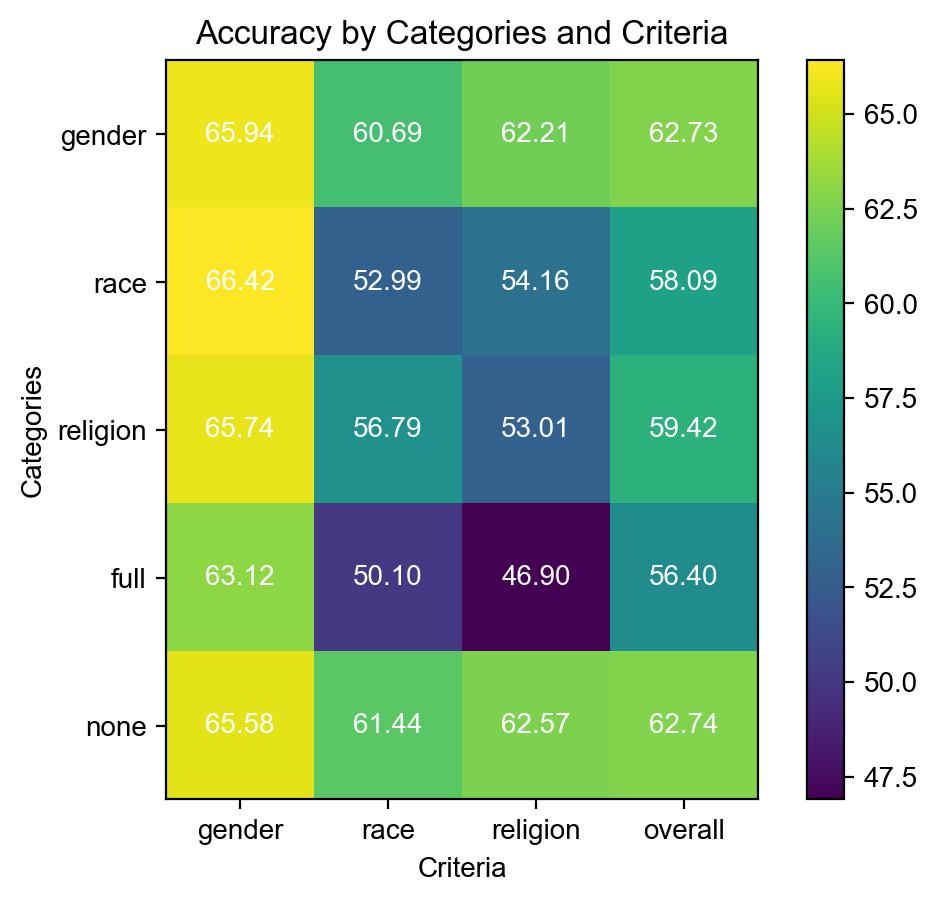

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the keys and accuracy values into separate lists
categories = list(res.keys())
criteria = list(res[categories[0]].keys())
data = np.array([[res[c][crit] for crit in criteria] for c in categories])

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='viridis')

# Add labels and title
ax.set_xticks(np.arange(len(criteria)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(criteria)
ax.set_yticklabels(categories)
ax.set_xlabel('Criteria')
ax.set_ylabel('Categories')
ax.set_title('Accuracy by Categories and Criteria')

# Add colorbar
fig.colorbar(im)

# Add values to the middle of each square
for i in range(len(categories)):
    for j in range(len(criteria)):
        text = ax.text(j, i, "{:.2f}".format(data[i, j]),
                       ha="center", va="center", color="w")

# Display the plot
plt.show()


In [36]:
[tuple(int(color[i:i+2], 16) / 255 for i in (0, 2, 4)) for color in colors]

[(0.0, 0.07058823529411765, 0.09803921568627451),
 (0.0, 0.37254901960784315, 0.45098039215686275),
 (0.0392156862745098, 0.5764705882352941, 0.5882352941176471),
 (0.5803921568627451, 0.8235294117647058, 0.7411764705882353),
 (0.9137254901960784, 0.8470588235294118, 0.6509803921568628),
 (0.9333333333333333, 0.6078431372549019, 0.0),
 (0.792156862745098, 0.403921568627451, 0.00784313725490196),
 (0.7333333333333333, 0.24313725490196078, 0.011764705882352941),
 (0.6823529411764706, 0.12549019607843137, 0.07058823529411765),
 (0.6078431372549019, 0.13333333333333333, 0.14901960784313725)]

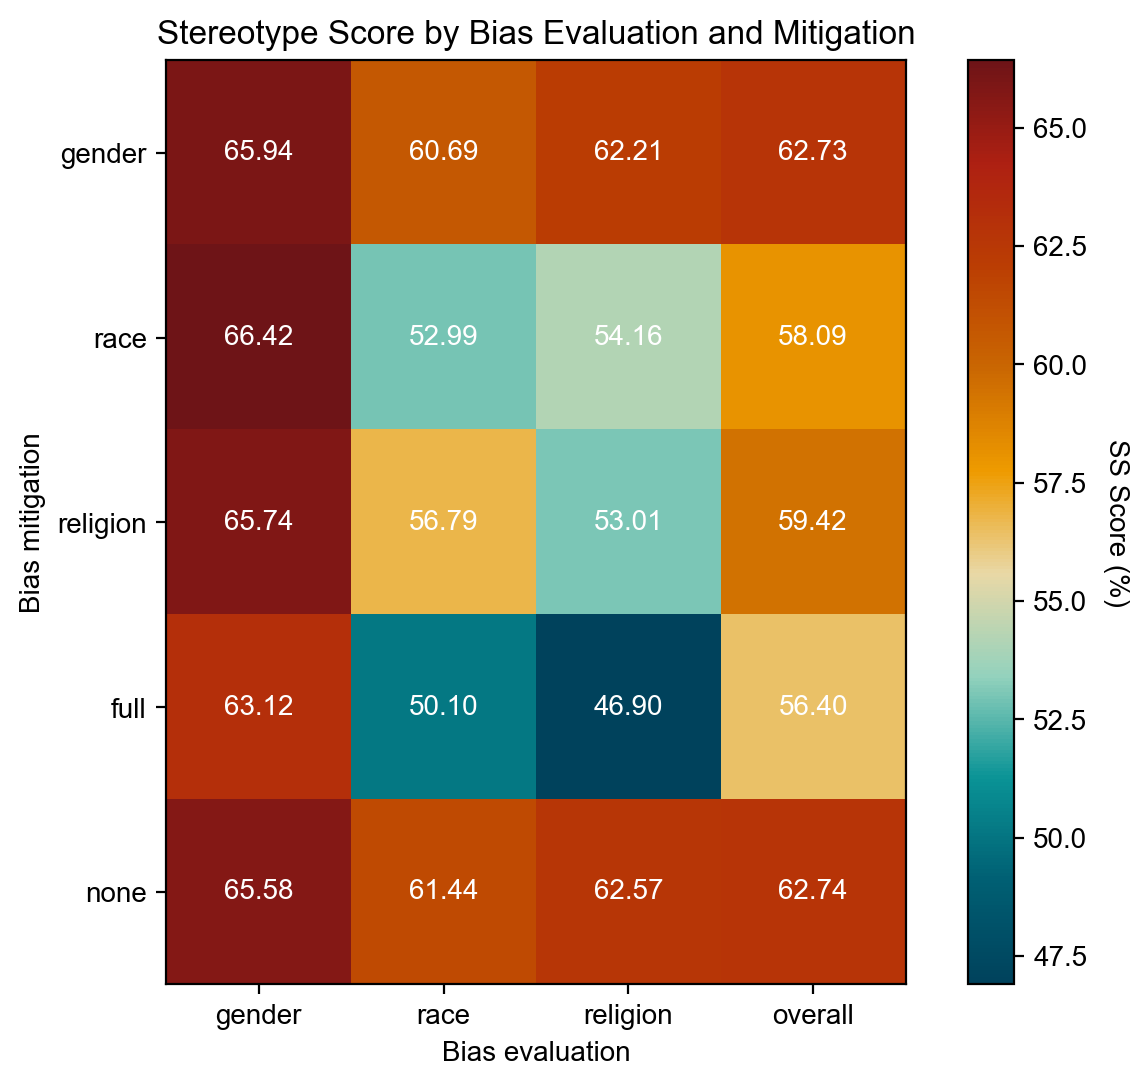

In [68]:

from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap
colors = ["00425c","005f73","0a9396","94d2bd","e9d8a6","ee9b00","ca6702","bb3e03","ae2012","6e1417"]
colors = [tuple(int(color[i:i+2], 16) / 255 for i in (0, 2, 4)) for color in colors]
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# colors = [(0.0, '#9b2226'), (0.45, '#bb3e03'), (0.5, '#00ff00'), (0.55, '#ee9b00'), (1.0, '#001219')]
# custom_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)
# cb = plt.colorbar(im, cmap=custom_cmap)
# cb.set_label('Score')

# Extract the keys and accuracy values into separate lists
categories = list(res.keys())
criteria = list(res[categories[0]].keys())
data = np.array([[res[c][crit] for crit in criteria] for c in categories])

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap=custom_cmap)

# Add labels and title
ax.set_xticks(np.arange(len(criteria)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(criteria)
ax.set_yticklabels(categories)
ax.set_xlabel('Bias evaluation')
ax.set_ylabel('Bias mitigation')
ax.set_title('Stereotype Score by Bias Evaluation and Mitigation')

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('SS Score (%)', rotation=270, labelpad=15)

# Add values to the middle of each square
for i in range(len(categories)):
    for j in range(len(criteria)):
        text = ax.text(j, i, "{:.2f}".format(data[i, j]),
                       ha="center", va="center", color="w")#, weight='bold')

# Display the plot
# plt.show()


In [69]:
fig.savefig('figures/stereoset_heatmap_med.pdf', dpi=1000, bbox_inches='tight')

## base models

In [7]:
res = {}
for demo in ['gender', 'race', 'religion']:
    path = "stereoset/dexperts_base_stereoset_"+demo+"_alpha=1.json"
    df = read_stereo(path)
    res[demo] = df.loc['SS Score'].to_dict()

df = read_stereo("stereoset/dexperts_base_stereoset_alpha=1.json")
res["full"] = df.loc['SS Score'].to_dict()

df = read_stereo("stereoset/gpt2_base_stereoset.json")
res["none"] = df.loc['SS Score'].to_dict()

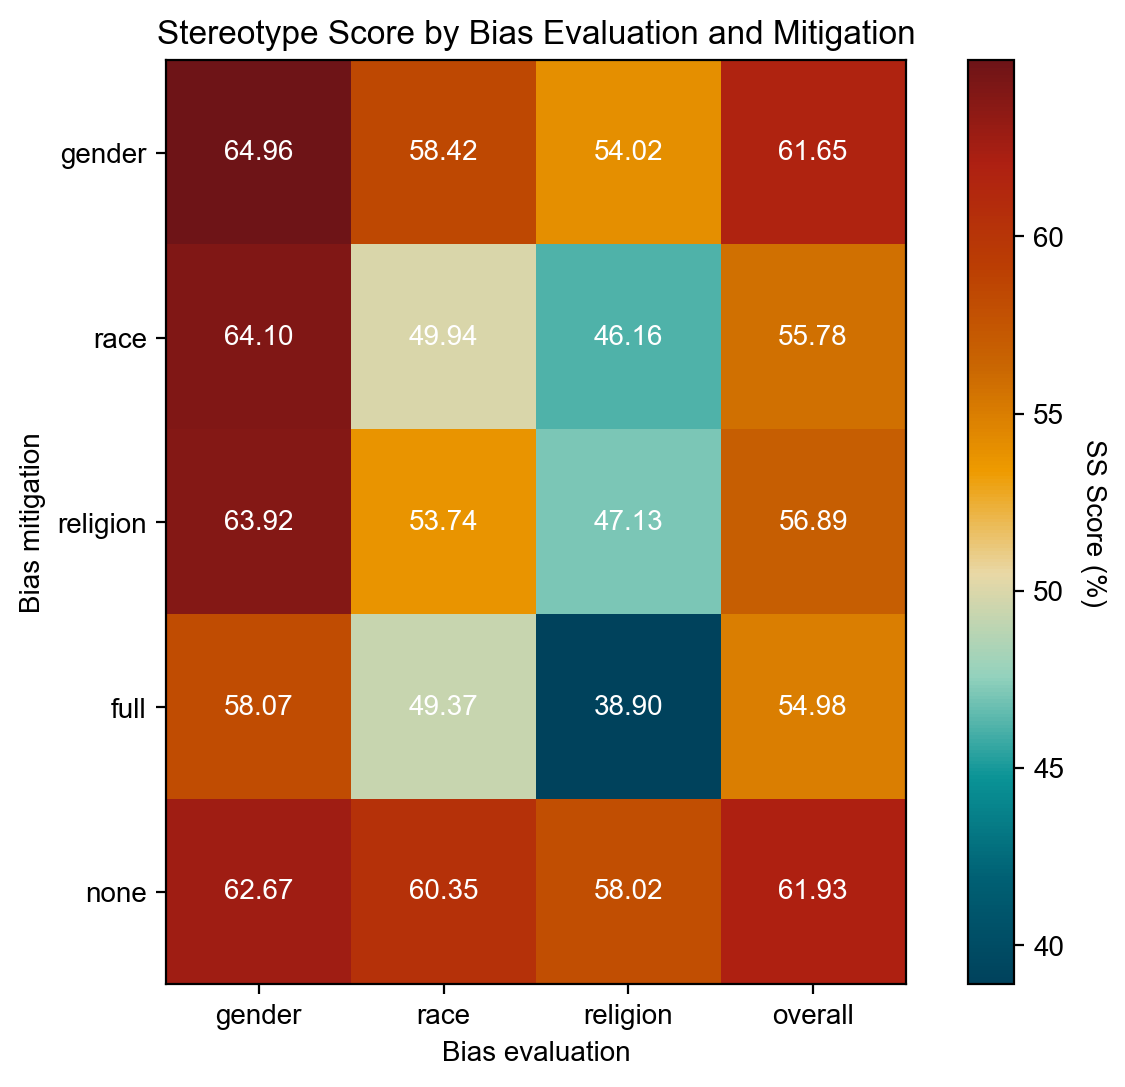

In [8]:

from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap
colors = ["00425c","005f73","0a9396","94d2bd","e9d8a6","ee9b00","ca6702","bb3e03","ae2012","6e1417"]
colors = [tuple(int(color[i:i+2], 16) / 255 for i in (0, 2, 4)) for color in colors]
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# colors = [(0.0, '#9b2226'), (0.45, '#bb3e03'), (0.5, '#00ff00'), (0.55, '#ee9b00'), (1.0, '#001219')]
# custom_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)
# cb = plt.colorbar(im, cmap=custom_cmap)
# cb.set_label('Score')

# Extract the keys and accuracy values into separate lists
categories = list(res.keys())
criteria = list(res[categories[0]].keys())
data = np.array([[res[c][crit] for crit in criteria] for c in categories])

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap=custom_cmap)

# Add labels and title
ax.set_xticks(np.arange(len(criteria)))
ax.set_yticks(np.arange(len(categories)))
ax.set_xticklabels(criteria)
ax.set_yticklabels(categories)
ax.set_xlabel('Bias evaluation')
ax.set_ylabel('Bias mitigation')
ax.set_title('Stereotype Score by Bias Evaluation and Mitigation')

# Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('SS Score (%)', rotation=270, labelpad=15)

# Add values to the middle of each square
for i in range(len(categories)):
    for j in range(len(criteria)):
        text = ax.text(j, i, "{:.2f}".format(data[i, j]),
                       ha="center", va="center", color="w")#, weight='bold')

# Display the plot
# plt.show()


In [9]:
fig.savefig('figures/stereoset_heatmap_base.pdf', dpi=1000, bbox_inches='tight')

In [10]:
import torch

In [16]:
torch.backends.mps.is_available()

True

In [14]:
torch.cuda

<module 'torch.cuda' from '/Users/eliott/Desktop/bias-free-nlg/venv/lib/python3.10/site-packages/torch/cuda/__init__.py'>

In [17]:
torch.device("mps")

device(type='mps')